## import

In [83]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import missingno as msno

# pd.set_option('display.max_columns', None)

## Read

In [2]:
 def read(path):
    df_origin = pd.read_csv(path)

    df = df_origin.replace(['Benign/Likely_benign', 'Pathogenic/Likely_pathogenic'], ['Likely_benign', 'Likely_pathogenic']) 

    df.drop(df[(df['CLNSIG'] != 'Benign') & (df['CLNSIG'] != 'Pathogenic') & (df['CLNSIG'] != 'Likely_benign') & (df['CLNSIG'] != 'Likely_pathogenic')].index, inplace=True)

    df.reset_index(inplace=True)

    col_names = ['CLNSIG', 'Consequence', 'EXON', 'INTRON', 'SIFT', 'PolyPhen', 'FATHMM_pred', 'MutationTaster_pred', 'PROVEAN_pred', 'Polyphen2_HDIV_pred', 'Polyphen2_HVAR_pred', 'SIFT_pred', 'IMPACT', 'M-CAP_pred', 'MetaSVM_pred', 'MutationAssessor_pred', 'rf_score', 'ada_score', 'CADD_phred', 'CADD_raw', 'CADD_raw_rankscore', 'DANN_rankscore', 'DANN_score', 'Eigen-PC-raw', 'MutPred_rankscore', 'MutPred_score', 'REVEL_rankscore', 'REVEL_score', 'SiPhy_29way_logOdds', 'SiPhy_29way_logOdds_rankscore', 'VEST3_rankscore', 'VEST3_score', 'phastCons100way_vertebrate', 'phastCons20way_mammalian', 'phyloP100way_vertebrate', 'phyloP20way_mammalian', 'GERP++_RS', 'GERP++_NR', 'MAX_AF']
    df = df[col_names]
    return df_origin, df

In [3]:
df_origin, df = read('./../data/f2.csv')

lb = LabelEncoder()
level_4_target = lb.fit_transform(df['CLNSIG'])

level_2_target = pd.Series(level_4_target).apply(lambda x: 0 if x <2 else 1)

## Consequence

### df

In [4]:
consequence_split = df['Consequence'].apply(lambda x: x if pd.isna(x) else x.split('&'))
mlb = MultiLabelBinarizer()
consequence_df = pd.DataFrame(mlb.fit_transform(consequence_split), columns=mlb.classes_)
# df['Consequence'].value_counts()

In [81]:
consequence_tree = tree.DecisionTreeClassifier()
consequence_tree.fit(consequence_df, level_2_target)

DecisionTreeClassifier()

### test

In [16]:
# t = consequence_df.merge(level_2_target.rename('target'), left_index=True, right_index=True)


In [22]:
# consequence_col = t.columns
# for item in consequence_col:
#     # print(item, '\t', t[item].sum())
#     print(item, '\n', t[t[item] == 1]['target'].value_counts())

3_prime_UTR_variant 
 0    16700
1      615
Name: target, dtype: int64
5_prime_UTR_variant 
 0    5688
1    1119
Name: target, dtype: int64
coding_sequence_variant 
 1    1341
0      32
Name: target, dtype: int64
downstream_gene_variant 
 0    3887
1    1835
Name: target, dtype: int64
frameshift_variant 
 1    40185
0      473
Name: target, dtype: int64
inframe_deletion 
 1    1499
0     693
Name: target, dtype: int64
inframe_insertion 
 0    460
1    369
Name: target, dtype: int64
intergenic_variant 
 0    5
Name: target, dtype: int64
intron_variant 
 0    64517
1     6662
Name: target, dtype: int64
missense_variant 
 0    40224
1    36191
Name: target, dtype: int64
protein_altering_variant 
 1    141
0     15
Name: target, dtype: int64
splice_acceptor_variant 
 1    6790
0     138
Name: target, dtype: int64
splice_donor_variant 
 1    8318
0     121
Name: target, dtype: int64
splice_region_variant 
 0    19675
1     6112
Name: target, dtype: int64
start_lost 
 1    684
0     48
Name:

In [75]:
# (t['5_prime_UTR_variant'] == 1) & 
# t[(t['coding_sequence_variant'] == 1) & (t['target'] == 1)] # 序列变异高致病性 intron 和 splice 良性？
# t[(t['coding_sequence_variant'] == 1) ] # & (t['target'] == 0)

,3_prime_UTR_variant,5_prime_UTR_variant,coding_sequence_variant,downstream_gene_variant,frameshift_variant,inframe_deletion,inframe_insertion,intergenic_variant,intron_variant,missense_variant,protein_altering_variant,splice_acceptor_variant,splice_donor_variant,splice_region_variant,start_lost,start_retained_variant,stop_gained,stop_lost,stop_retained_variant,synonymous_variant,transcript_ablation,upstream_gene_variant,target
239,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
433,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
609,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
2466,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2491,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391220,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
392304,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
392478,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
393146,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

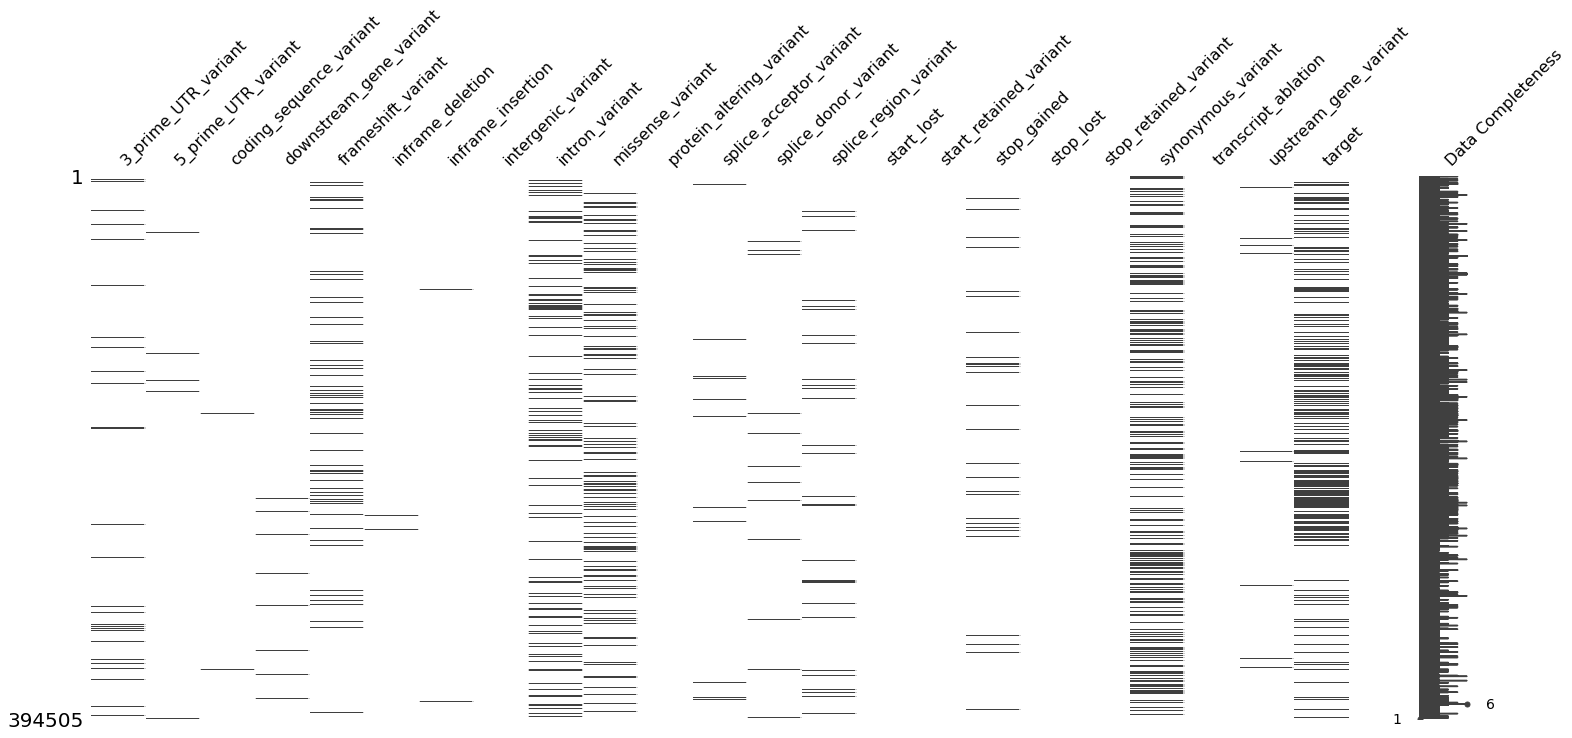

In [70]:
# msno.matrix(t.replace(0, np.nan), labels=True)

In [85]:
consequence_p = ['coding_sequence_variant', 'frameshift_variant', 'inframe_deletion', 'splice_acceptor_variant', 'splice_donor_variant', 'splice_region_variant', 'protein_altering_variant', 'start_lost', 'stop_gained', 'stop_lost', 'transcript_ablation']

### model

In [88]:
ros = RandomOverSampler(random_state=0)

X_train_cons, X_test_cons, y_train_cons, y_test_cons = train_test_split(consequence_df, level_2_target, test_size = 0.25, shuffle = True)
X_train_cons, y_train_cons = ros.fit_resample(X_train_cons, y_train_cons)

consequence_tree2 = tree.DecisionTreeClassifier()
consequence_tree2.fit(X_train_cons, y_train_cons)

consequence_tree2.score(X_test_cons, y_test_cons)

0.8618836626887161

## AF_MAX